# <center><b> <em> Data Preprocessing </em> </b></center>

## <font color="green"> | - Partie 1</font>

In [265]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [266]:
#df = pd.read_csv("../data/bronze.csv", delimiter=";")
df = pd.read_csv("../data/gold_data.csv", parse_dates = True)

df.head()

,Unnamed: 0,date_heure,date,heure,consommation_brute_electricite_rte
0,16,2013-01-21T11:00:00+01:00,2013-01-21,11:00,8514
1,48,2013-01-21T19:00:00+01:00,2013-01-21,19:00,8797
2,53,2013-01-21T20:00:00+01:00,2013-01-21,20:00,8567
3,59,2013-01-21T21:00:00+01:00,2013-01-21,21:00,8009
4,70,2013-01-21T23:00:00+01:00,2013-01-21,23:00,7541


Description du fichier

    Date - Heure: date_heure[datetime]
    Date: date[date]
    Heure: heure[text]
    Code INSEE région: code_insee_region[text]
    Région: region[text]
    Consommation brute gaz (MW PCS 0°C) - GRTgaz: consommation_brute_gaz_grtgaz[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C au périmètre GRTgaz
    Statut - GRTgaz: statut_grtgaz[text]
    Consommation brute gaz (MW PCS 0°C) - Teréga: consommation_brute_gaz_terega[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C au périmètre Teréga
    Statut - Teréga: statut_terega[text]
    Consommation brute gaz totale (MW PCS 0°C): consommation_brute_gaz_totale[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C
    Consommation brute électricité (MW) - RTE: consommation_brute_electricite_rte[int] Consommation brute régionale d’électricité au pas 30 minutes en MW
    Statut - RTE: statut_rte[text]
    Consommation brute totale (MW): consommation_brute_totale[int] Consommation brute régionale totale au pas horaire en MW


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183983 entries, 0 to 183982
Data columns (total 5 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          183983 non-null  int64 
 1   date_heure                          183983 non-null  object
 2   date                                183983 non-null  object
 3   heure                               183983 non-null  object
 4   consommation_brute_electricite_rte  183983 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.0+ MB


In [268]:
df.shape

(183983, 5)

In [269]:
# Convertir la colonne "date_heure" en un objet datetime
df['date_heure'] = pd.to_datetime(df['date_heure'])

In [270]:
# Convertir la colonne "date_heure" en un objet datetime
df['date'] = pd.to_datetime(df['date'])

In [271]:
df.isnull().sum()

Unnamed: 0                            0
date_heure                            0
date                                  0
heure                                 0
consommation_brute_electricite_rte    0
dtype: int64

In [272]:
df.isnull().sum()

Unnamed: 0                            0
date_heure                            0
date                                  0
heure                                 0
consommation_brute_electricite_rte    0
dtype: int64

In [273]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000


In [274]:
df.head()

,Unnamed: 0,date_heure,date,heure,consommation_brute_electricite_rte
0,16,2013-01-21 11:00:00+01:00,2013-01-21,11:00,8514
1,48,2013-01-21 19:00:00+01:00,2013-01-21,19:00,8797
2,53,2013-01-21 20:00:00+01:00,2013-01-21,20:00,8567
3,59,2013-01-21 21:00:00+01:00,2013-01-21,21:00,8009
4,70,2013-01-21 23:00:00+01:00,2013-01-21,23:00,7541


### 1) A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date_heure.

<Axes: >

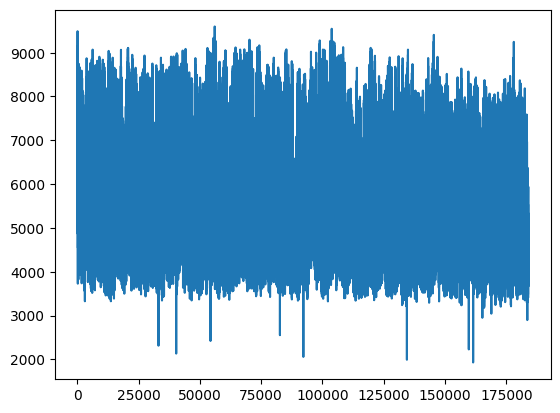

In [275]:
df["consommation_brute_electricite_rte"].plot()

### 2) Affichez cette même série temporelle en rassemblant:
Par année
Par trimestre
Par mois
Par semaine
Par jour


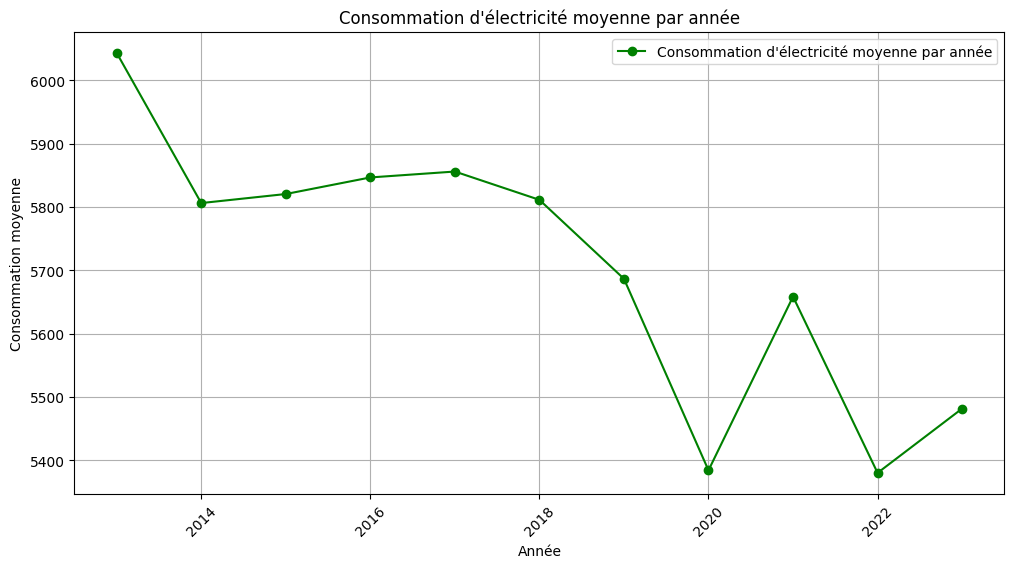

In [276]:
# Créez un nouveau DataFrame avec la consommation moyenne par année
df_avg_by_year = df.groupby(df['date'].dt.year)['consommation_brute_electricite_rte'].mean().reset_index()

# Créez le graphique de la consommation moyenne par année
plt.figure(figsize=(12, 6))
plt.plot(df_avg_by_year['date'], df_avg_by_year['consommation_brute_electricite_rte'], label='Consommation d\'électricité moyenne par année', marker='o', linestyle='-', color='g')
plt.xlabel('Année')
plt.ylabel('Consommation moyenne')
plt.title('Consommation d\'électricité moyenne par année')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

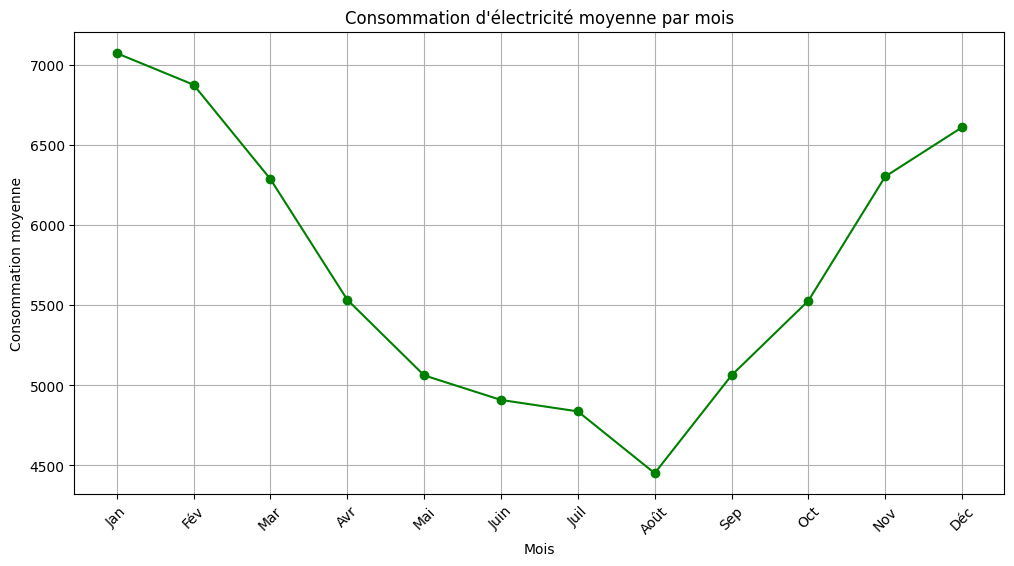

In [277]:
# Créez un nouveau DataFrame avec la consommation moyenne par mois
df['mois'] = df['date'].dt.month
df_avg_by_month = df.groupby('mois')['consommation_brute_electricite_rte'].mean().reset_index()

# Créez le graphique de la consommation moyenne par mois
mois_labels = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
plt.figure(figsize=(12, 6))
plt.plot(mois_labels, df_avg_by_month['consommation_brute_electricite_rte'], marker='o', linestyle='-', color='g')
plt.xlabel('Mois')
plt.ylabel('Consommation moyenne')
plt.title('Consommation d\'électricité moyenne par mois')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


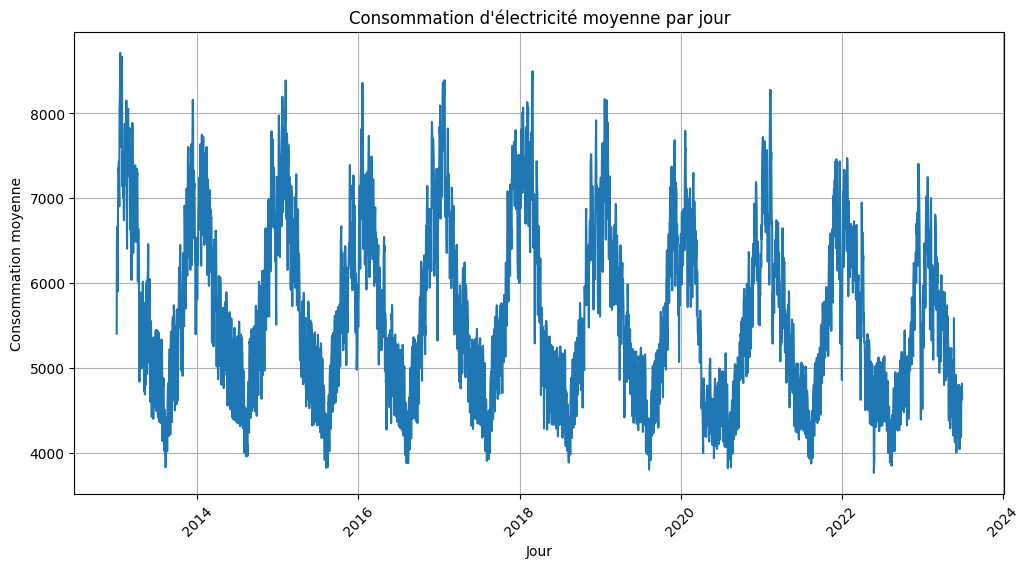

In [278]:
# Créez un nouveau DataFrame avec la consommation moyenne par jour
df['jour'] = df['date'].dt.date
df_avg_by_day = df.groupby('jour')['consommation_brute_electricite_rte'].mean().reset_index()

# Créez le graphique de la consommation moyenne par jour
plt.figure(figsize=(12, 6))
plt.plot(df_avg_by_day['jour'], df_avg_by_day['consommation_brute_electricite_rte'])
plt.xlabel('Jour')
plt.ylabel('Consommation moyenne')
plt.title('Consommation d\'électricité moyenne par jour')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [279]:
df.head()

,Unnamed: 0,date_heure,date,heure,consommation_brute_electricite_rte,mois,jour
0,16,2013-01-21 11:00:00+01:00,2013-01-21,11:00,8514,1,2013-01-21
1,48,2013-01-21 19:00:00+01:00,2013-01-21,19:00,8797,1,2013-01-21
2,53,2013-01-21 20:00:00+01:00,2013-01-21,20:00,8567,1,2013-01-21
3,59,2013-01-21 21:00:00+01:00,2013-01-21,21:00,8009,1,2013-01-21
4,70,2013-01-21 23:00:00+01:00,2013-01-21,23:00,7541,1,2013-01-21


In [280]:
df.dtypes

Unnamed: 0                                     int64
date_heure                                    object
date                                  datetime64[ns]
heure                                         object
consommation_brute_electricite_rte             int64
mois                                           int64
jour                                          object
dtype: object

/tmp/ipykernel_9166/3320988233.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = df.resample('W').mean()


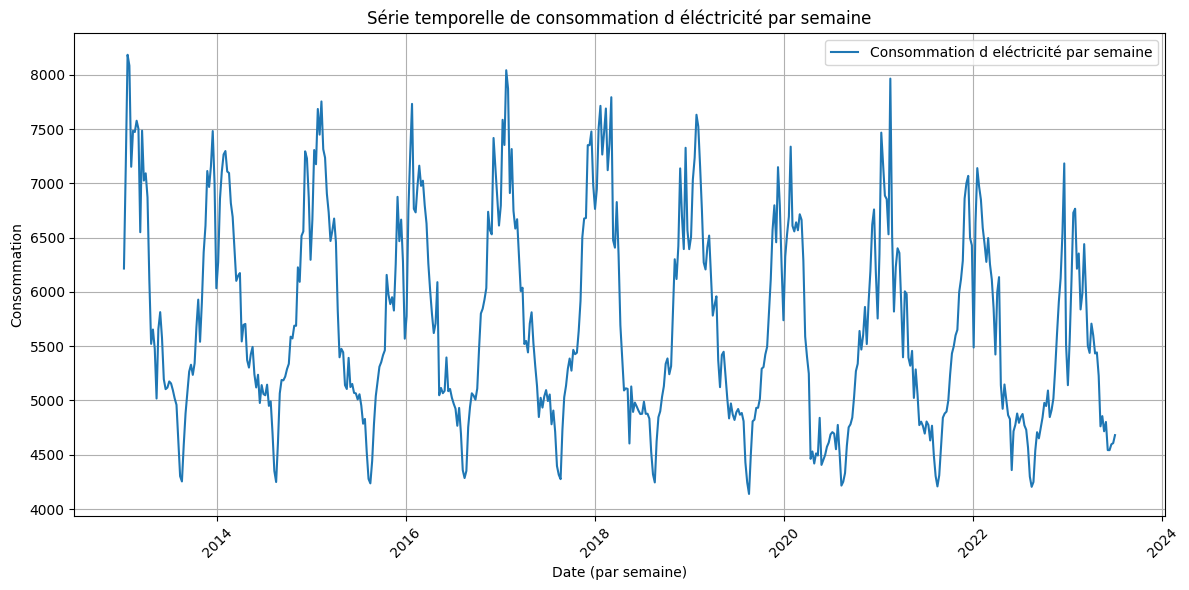

In [281]:
# Définir la colonne "date_heure" comme index
df.set_index('date', inplace=True)


# Définir la fréquence d'échantillonnage par semaine
weekly_data = df.resample('W').mean()

# Créer le graphique pour la consommation de gaz par semaine
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['consommation_brute_electricite_rte'], label='Consommation d eléctricité par semaine')
plt.xlabel('Date (par semaine)')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d éléctricité par semaine')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Afficher le graphique par semaine
plt.tight_layout()
plt.show()

/tmp/ipykernel_9166/2412363437.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_data = df.resample('Q').mean()


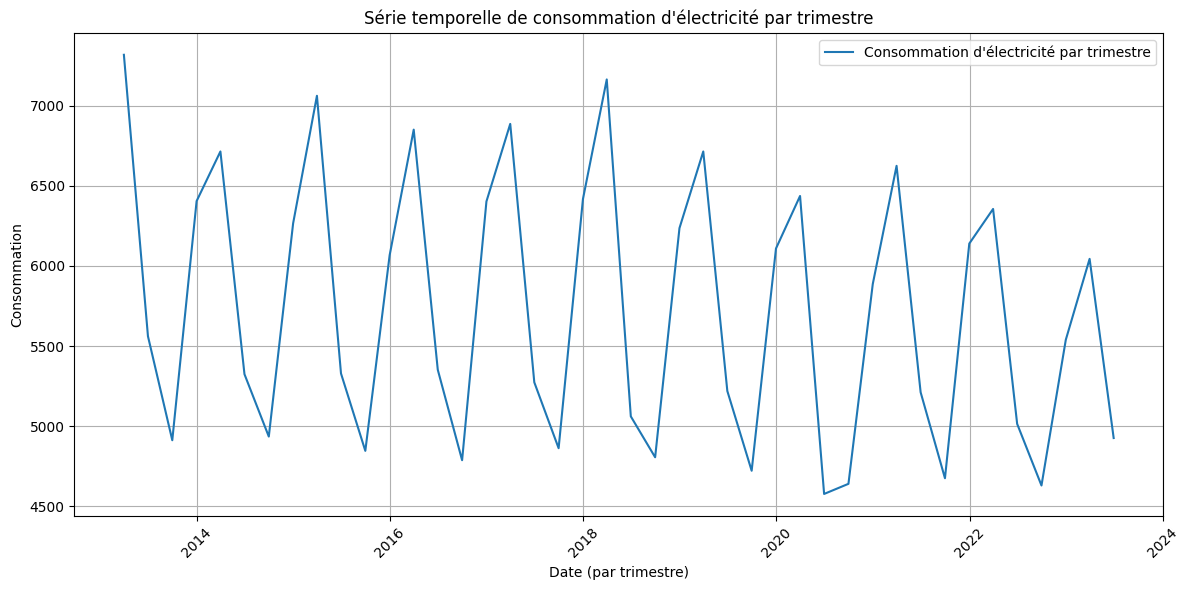

In [282]:

# Définir la fréquence d'échantillonnage par trimestre (3 mois)
quarterly_data = df.resample('Q').mean()

# Créer le graphique pour la consommation d'électricité par trimestre
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data['consommation_brute_electricite_rte'], label='Consommation d\'électricité par trimestre')
plt.xlabel('Date (par trimestre)')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d\'électricité par trimestre')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Afficher le graphique par trimestre
plt.tight_layout()
plt.show()

### 3) A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

/tmp/ipykernel_9166/3925491282.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = df.resample('w').mean()


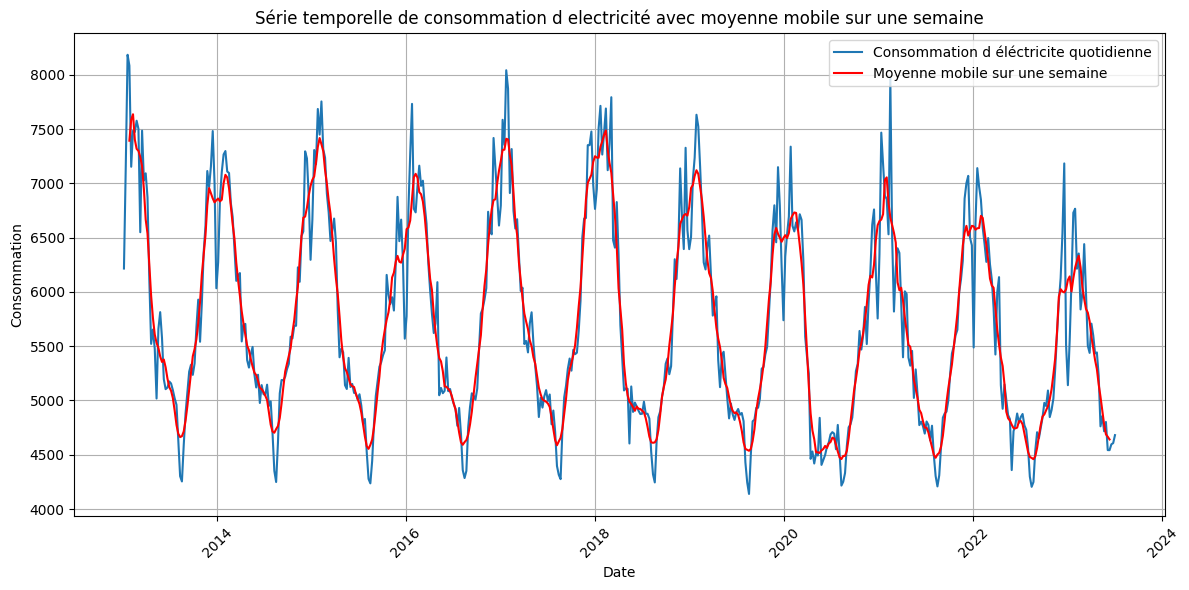

In [283]:
# Définir la fréquence d'échantillonnage par jour
daily_data = df.resample('w').mean()

# Calculer la moyenne mobile sur une semaine centrée et symétrique
rolling_weekly_mean = daily_data['consommation_brute_electricite_rte'].rolling(window=7, center=True).mean()

# Créer le graphique pour la moyenne mobile
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['consommation_brute_electricite_rte'], label='Consommation d éléctricite quotidienne')
plt.plot(rolling_weekly_mean.index, rolling_weekly_mean, label='Moyenne mobile sur une semaine', color='red')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d electricité avec moyenne mobile sur une semaine')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Afficher le graphique avec la moyenne mobile
plt.tight_layout()
plt.show()


### 4) Quelle est la différence entre la moyenne mobile et les agrégations précédentes?

La principale différence entre la moyenne mobile et les agrégations précédentes (comme l'agrégation quotidienne ou trimestrielle) réside dans la manière dont elles traitent les données temporelles et l'objectif de chacune d'elles :

    Agrégations (quotidiennes, trimestrielles, etc.) :
        Les agrégations consistent à regrouper les données sur une période de temps donnée (par exemple, par jour, par trimestre) et à effectuer une opération (telle que la moyenne, la somme, etc.) sur les valeurs de cette période.
        Elles réduisent la résolution temporelle des données, ce qui signifie que vous obtenez une vue d'ensemble sur des périodes plus longues, ce qui peut aider à détecter des tendances à plus long terme.
        Cependant, elles ne lissent pas nécessairement les fluctuations à court terme. Les variations à court terme sont toujours visibles dans les données agrégées.

    Moyenne Mobile :
        La moyenne mobile consiste à calculer la moyenne des données sur une fenêtre de temps glissante. La fenêtre de temps est centrée autour de chaque point de données, de sorte qu'elle lisse les fluctuations à court terme.
        Elle est utilisée pour atténuer le bruit et mettre en évidence les tendances à moyen terme dans les données.
        La moyenne mobile est particulièrement utile pour identifier des modèles de variation à moyen terme et pour rendre les données plus lisses et plus faciles à interpréter.

En résumé, les agrégations sont principalement utilisées pour réduire la résolution temporelle des données et obtenir une vue d'ensemble sur des périodes plus longues, tandis que la moyenne mobile est utilisée pour lisser les données en atténuant les fluctuations à court terme et en mettant en évidence les tendances à moyen terme. Le choix entre les deux dépend de l'objectif de votre analyse et de la façon dont vous souhaitez interpréter les données temporelles.

### 5) A l’aide de box-plots, observez la saisonnalité:
trimestrielle (chaque trimestre)
mensuelle (chaque mois)
hebdomadaire (chaque jour)
journalière (chaque heure)


In [284]:
df.head()

,Unnamed: 0,date_heure,heure,consommation_brute_electricite_rte,mois,jour
date,,,,,,
2013-01-21,16,2013-01-21 11:00:00+01:00,11:00,8514,1,2013-01-21
2013-01-21,48,2013-01-21 19:00:00+01:00,19:00,8797,1,2013-01-21
2013-01-21,53,2013-01-21 20:00:00+01:00,20:00,8567,1,2013-01-21
2013-01-21,59,2013-01-21 21:00:00+01:00,21:00,8009,1,2013-01-21
2013-01-21,70,2013-01-21 23:00:00+01:00,23:00,7541,1,2013-01-21


<Figure size 1600x600 with 0 Axes>

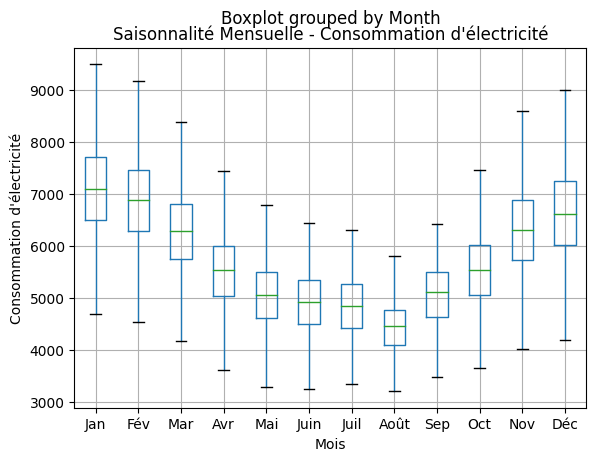

In [285]:
# Extraire les mois comme une colonne dans le DataFrame
df['Month'] = df.index.month

# Créez une figure pour le graphique de boîtes à moustaches
plt.figure(figsize=(16, 6))  # Ajustez la largeur (16) selon vos besoins

# Créez le graphique de boîtes à moustaches pour chaque mois
df.boxplot(column='consommation_brute_electricite_rte', by='Month', showfliers=False)
plt.title('Saisonnalité Mensuelle - Consommation d\'électricité')
plt.xlabel('Mois')
plt.ylabel('Consommation d\'électricité')

# Définissez les étiquettes de l'axe x pour correspondre aux mois
months = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
plt.xticks(range(1, 13), months)

# Affichez le graphique
plt.show()


    Saisonnalité :
        Si les médianes des boîtes (lignes épaisses à l'intérieur des boîtes) varient considérablement d'une période à l'autre (trimestre, mois, semaine, jour), cela suggère une saisonnalité dans les données. Par exemple, si la médiane est plus élevée en hiver qu'en été, cela indique une saisonnalité saisonnière.

    Variabilité :
        L'étendue des boîtes (distance entre le premier quartile - Q1 - et le troisième quartile - Q3) reflète la variabilité des données. Si la boîte est étendue, cela signifie que les données sont dispersées sur une large gamme. Si la boîte est étroite, cela signifie que les données sont plus concentrées autour de la médiane.

    Valeurs aberrantes :
        Les points situés en dehors des "moustaches" des box-plots (généralement définies comme 1,5 fois l'étendue interquartile) sont considérés comme des valeurs aberrantes. Vous pouvez repérer ces valeurs qui se trouvent au-delà des moustaches et les examiner plus en détail.

    Tendances :
        Les box-plots montrent également les tendances centrales (médiane) et les valeurs extrêmes (points situés en dehors des moustaches) pour chaque période. Cela vous permet de détecter des tendances à la hausse ou à la baisse dans la consommation d'électricité.

    Comparaisons :
        Vous pouvez comparer les box-plots de différentes périodes pour identifier les variations saisonnières. Par exemple, si la consommation d'électricité est généralement plus élevée les mois d'hiver que les mois d'été, cela indique une saisonnalité hivernale.

<Figure size 1600x600 with 0 Axes>

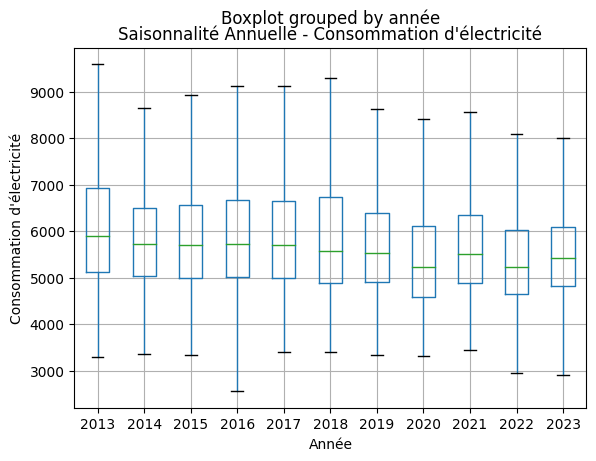

In [286]:
# Créez une nouvelle colonne 'année' en extrayant l'année de la colonne de date
df['année'] = df.index.year

# Créez une figure pour le graphique de boîtes à moustaches
plt.figure(figsize=(16, 6))

# Créez le graphique de boîtes à moustaches pour chaque année
df.boxplot(column='consommation_brute_electricite_rte', by='année', showfliers=False)
plt.title('Saisonnalité Annuelle - Consommation d\'électricité')
plt.xlabel('Année')
plt.ylabel('Consommation d\'électricité')

# Affichez le graphique
plt.show()

<Figure size 2500x1500 with 0 Axes>

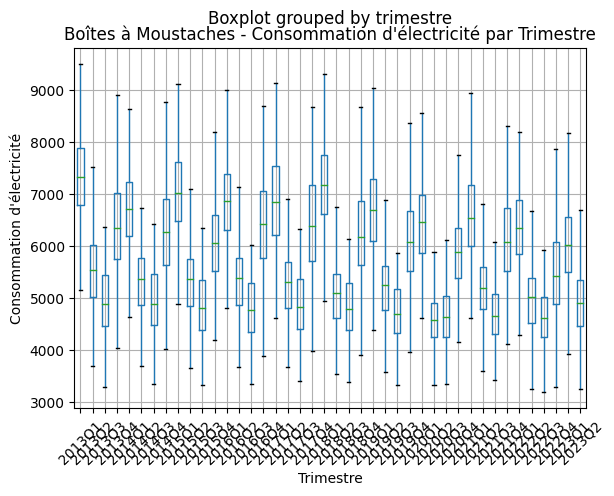

In [287]:
# Créez une nouvelle colonne 'trimestre' en extrayant le trimestre de la colonne de date
df['trimestre'] = df.index.to_period('Q')

# Créez le graphique de boîtes à moustaches par trimestre
plt.figure(figsize=(25, 15))
df.boxplot(column='consommation_brute_electricite_rte', by='trimestre', showfliers=False)
plt.title('Boîtes à Moustaches - Consommation d\'électricité par Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Consommation d\'électricité')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_9166/1229313979.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['semaine'] = df.index.week


<Figure size 1600x600 with 0 Axes>

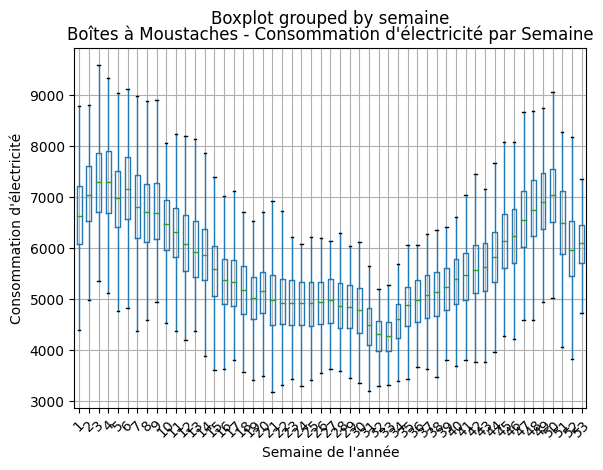

In [288]:
# Créez une nouvelle colonne 'semaine' en extrayant la semaine de l'année de la colonne de date
df['semaine'] = df.index.week

# Créez le graphique de boîtes à moustaches par semaine
plt.figure(figsize=(16, 6))
df.boxplot(column='consommation_brute_electricite_rte', by='semaine', showfliers=False)
plt.title('Boîtes à Moustaches - Consommation d\'électricité par Semaine')
plt.xlabel('Semaine de l\'année')
plt.ylabel('Consommation d\'électricité')
plt.xticks(rotation=45)
plt.show()

<Figure size 1600x600 with 0 Axes>

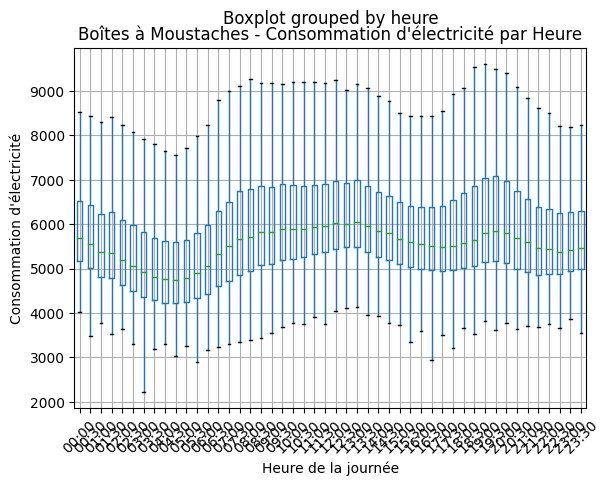

In [289]:
# Créez le graphique de boîtes à moustaches par heure
plt.figure(figsize=(16, 6))
df.boxplot(column='consommation_brute_electricite_rte', by='heure', showfliers=False)
plt.title('Boîtes à Moustaches - Consommation d\'électricité par Heure')
plt.xlabel('Heure de la journée')
plt.ylabel('Consommation d\'électricité')
plt.xticks(rotation=45)
plt.show()

### 6) Qu’est ce que la stationnarité? 

La stationnarité est une propriété importante des séries temporelles, qui signifie essentiellement que les caractéristiques statistiques de la série ne changent pas avec le temps. En d'autres termes, la stationnarité suppose que la moyenne, la variance et la structure de corrélation de la série restent constantes sur toute la période d'observation.

Visuellement, une série temporelle stationnaire serait une série dont les caractéristiques (moyenne, variance, etc.) semblent rester relativement constantes au fil du temps, sans tendance apparente ou saisonnalité significative. Une série non stationnaire, en revanche, montrerait des tendances ou des motifs saisonniers clairs.

### 7) Visuellement, pour vous la time serie est-elle stationnaire ou non stationnaire? 


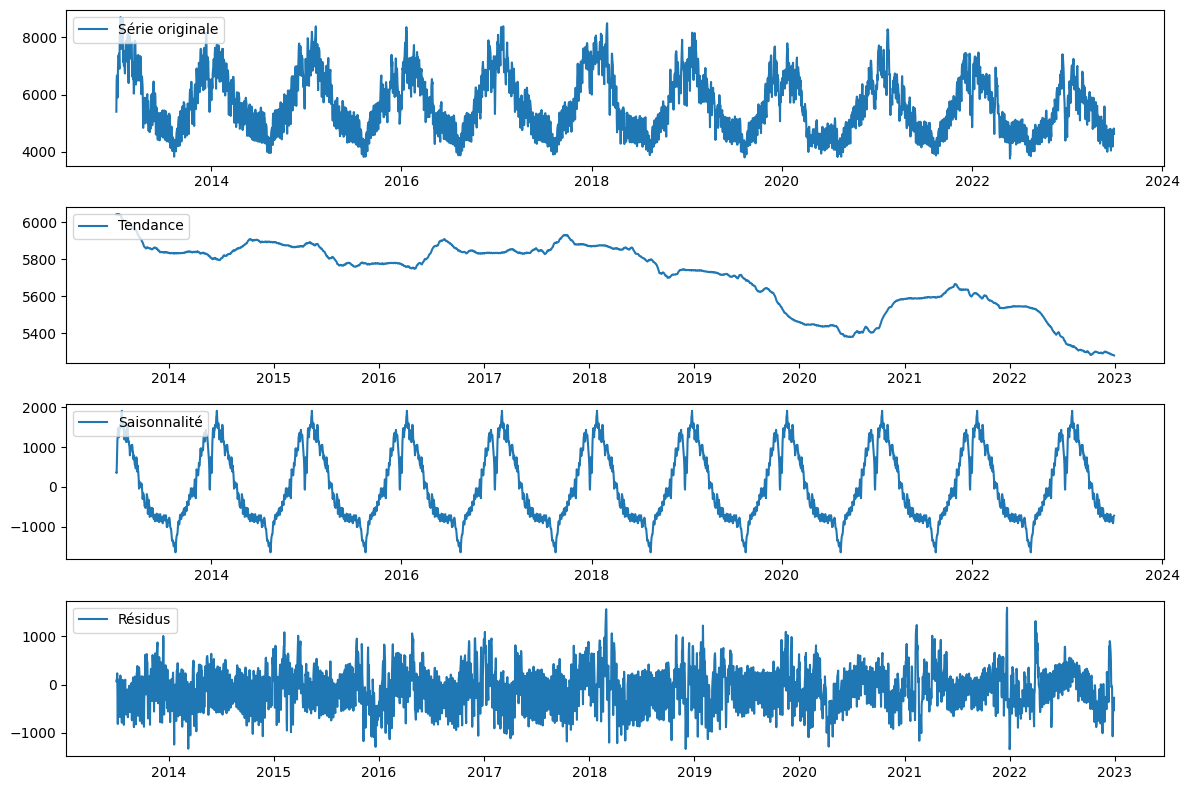

In [290]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Définir la fréquence d'échantillonnage par jour
daily_data = df_avg_by_day.set_index('jour')

# Appliquer la décomposition saisonnière
decomposition = sm.tsa.seasonal_decompose(daily_data, model='additive', period=365)

# Obtenez les composantes
tendance = decomposition.trend
saisonnalite = decomposition.seasonal
residus = decomposition.resid

# Afficher les composantes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(daily_data, label='Série originale')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(tendance, label='Tendance')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(saisonnalite, label='Saisonnalité')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residus, label='Résidus')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


### 8) Réalisez un test de Dickey Fuller, quelle est l’hypothèse nulle et l’hypothèse alternative, quelle est la statistique calculée et quelle distribution théorique suit elle d’après l’hypothèse nulle. Quelle est la probabilité que la statistique sous l’hypothèse H0 prenne un valeur aussi extrême voir plus extrême? 

Le test de Dickey-Fuller Augmenté (ADF) est un test statistique utilisé pour déterminer si une série temporelle est stationnaire ou non. Voici les hypothèses du test de Dickey-Fuller :

Hypothèse Nulle (H0) : L'hypothèse nulle suppose que la série temporelle possède une racine unitaire, ce qui signifie qu'elle n'est pas stationnaire. En d'autres termes, la série temporelle présente une structure temporelle qui évolue au fil du temps.

Hypothèse Alternative (H1) : L'hypothèse alternative suppose que la série temporelle ne possède pas de racine unitaire, ce qui signifie qu'elle est stationnaire. En d'autres termes, la série temporelle ne présente pas de tendance ou de structure temporelle significative.

La statistique calculée dans le test de Dickey-Fuller est appelée la statistique de test de Dickey-Fuller (ADF). Cette statistique est comparée à une distribution de référence sous l'hypothèse nulle.

Si la statistique ADF est inférieure aux valeurs critiques (ou si la p-value associée est suffisamment faible), cela signifie que nous pouvons rejeter l'hypothèse nulle, ce qui suggère que la série temporelle est stationnaire. Si la statistique ADF est supérieure aux valeurs critiques (ou si la p-value est élevée), nous ne pouvons pas rejeter l'hypothèse nulle, ce qui suggère que la série temporelle n'est pas stationnaire.

La probabilité que la statistique ADF sous l'hypothèse nulle prenne une valeur aussi extrême ou plus extrême est la p-value. Plus la p-value est faible, plus il est probable que la série temporelle soit stationnaire.

In [291]:
serie_temporelle = daily_data

In [292]:
from statsmodels.tsa.stattools import adfuller


# Effectuer le test de Dickey-Fuller
result = adfuller(serie_temporelle, autolag='AIC')


# Extraire les résultats du test
adf_statistique = result[0]
p_valeur = result[1]
valeurs_critiques = result[4]

# Afficher les résultats
print(f'Statistique ADF : {adf_statistique}')
print(f'P-valeur : {p_valeur}')
print('Valeurs critiques :')
for key, value in valeurs_critiques.items():
    print(f'    {key}: {value}')

# Interpréter les résultats
if p_valeur <= 0.05:
    print("La série temporelle est stationnaire (rejette l'hypothèse nulle)")
else:
    print("La série temporelle n'est pas stationnaire (ne rejette pas l'hypothèse nulle)")

Statistique ADF : -4.231797048300965
P-valeur : 0.0005818308009864074
Valeurs critiques :
    1%: -3.4320711258652885
    5%: -2.862300498788623
    10%: -2.5671748234670364
La série temporelle est stationnaire (rejette l'hypothèse nulle)


### 9) Même consigne pour le test de KPSS

In [293]:
from statsmodels.tsa.stattools import kpss

# Effectuez le test KPSS
result = kpss(serie_temporelle, regression='c')

# Extrayez les statistiques de test et les valeurs critiques
kpss_statistic = result[0]
p_value = result[1]
critical_values = result[3]

# Affichez les résultats du test
print("Statistique de test KPSS :", kpss_statistic)
print("Valeur p du test KPSS :", p_value)
print("Valeurs critiques du test KPSS :", critical_values)

# Interprétation du test KPSS
if p_value < 0.05:
    print("La série n'est pas stationnaire autour d'une tendance déterministe (rejeter l'hypothèse nulle)")
else:
    print("La série est stationnaire autour d'une tendance déterministe (ne pas rejeter l'hypothèse nulle)")


Statistique de test KPSS : 0.4932153994521093
Valeur p du test KPSS : 0.04319472985312854
Valeurs critiques du test KPSS : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
La série n'est pas stationnaire autour d'une tendance déterministe (rejeter l'hypothèse nulle)


### 10) Désaisonnalisez la composante annuelle de votre time série est utilisez à nouveau le test de Dickey Fuller. Que comprenez vous de ce résultat?

In [294]:

# Appliquez une moyenne mobile annuelle (365 jours) pour lisser la saisonnalité
window = 365
serie_temporelle_lissee = serie_temporelle - serie_temporelle.rolling(window=window, min_periods=1, center=True).mean()

### 11) Sur la time serie désaisonnalisée, réalisez à nouveau un test de KPSS. Que peut-on en conclure?

In [295]:

# Effectuez le test de Dickey-Fuller sur la série temporelle désaisonnalisée
result = adfuller(serie_temporelle_lissee.dropna())

# Extrayez la statistique de test et la valeur p
adf_statistic = result[0]
p_value = result[1]

# Affichez les résultats du test
print("Statistique de test de Dickey-Fuller :", adf_statistic)
print("Valeur p du test de Dickey-Fuller :", p_value)

# Interprétation du test de Dickey-Fuller
if p_value < 0.05:
    print("La série désaisonnalisée est stationnaire (rejeter l'hypothèse nulle)")
else:
    print("La série désaisonnalisée n'est pas stationnaire (ne pas rejeter l'hypothèse nulle)")

Statistique de test de Dickey-Fuller : -4.294255432377238
Valeur p du test de Dickey-Fuller : 0.00045449809600647004
La série désaisonnalisée est stationnaire (rejeter l'hypothèse nulle)


## <font color="green"> || - Implémentation des meilleurs modèles</font> 

#### 1) Pourquoi est-on si attaché au fait que notre série temporelle soit stationnaire ? 

La stationnarité est cruciale pour les modèles ARIMA et SARIMA car elle garantit que les statistiques de la série restent constantes au fil du temps.   
Cela permet aux modèles de faire des prédictions basées sur des relations stables, car ils supposent que les modèles passés restent valables à l'avenir.

#### 2) Qu’est qu’un modèle AR, à quoi correspond le paramètre p ?

Un modèle AR (Auto Régressif) est basé sur la régression linéaire des observations actuelles sur les observations passées, où "p" correspond à l'ordre de la partie autorégressive,   
c'est-à-dire le nombre d'observations passées incluses dans le modèle.

#### 3) Qu’est ce qu’un modèle MA, à quoi correspond le paramètre q ? 

 Un modèle MA (Moyenne Mobile) est basé sur la régression linéaire des observations actuelles sur les erreurs passées, où "q" correspond à l'ordre de la partie moyenne mobile,  
  c'est-à-dire le nombre d'erreurs passées incluses dans le modèle.

#### 4) Qu’est ce que le modèle ARIMA et à quoi correspond le paramètre d ? 

Le modèle ARIMA (AutoRegressive Integrated Moving Average) combine l'auto-régression (AR) et la moyenne mobile (MA) avec un processus d'intégration.   
Le paramètre "d" correspond à l'ordre de différenciation nécessaire pour rendre la série temporelle stationnaire.

#### 5) Qu’est ce que le modèle SARIMA et à quoi correspond le paramètre s ?

Le modèle SARIMA (Seasonal ARIMA) étend ARIMA pour prendre en compte la saisonnalité. Le paramètre "s" correspond à la période de saisonnalité,  
 c'est-à-dire le nombre d'observations entre les saisons, permettant de modéliser les tendances saisonnières dans les données temporelles.

<Figure size 1200x600 with 0 Axes>

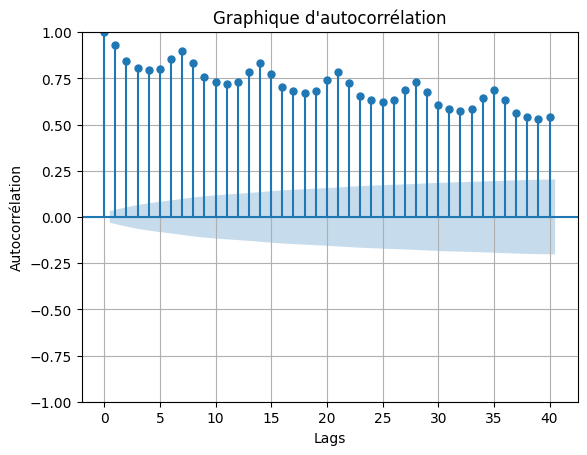

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Supposons que df soit votre DataFrame avec la série temporelle
# Assurez-vous que la colonne "consommation_brute_electricite_rte" est au format datetime

# Créez d'abord le graphique d'autocorrélation
plt.figure(figsize=(12, 6))
plot_acf(daily_data, lags=40)
plt.title("Graphique d'autocorrélation")
plt.xlabel("Lags")
plt.ylabel("Autocorrélation")
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

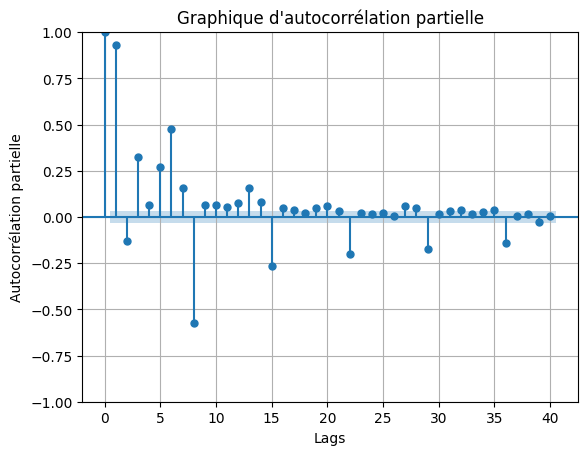

In [297]:
# Ensuite, créez le graphique d'autocorrélation partielle
plt.figure(figsize=(12, 6))
plot_pacf(daily_data, lags=40)
plt.title("Graphique d'autocorrélation partielle")
plt.xlabel("Lags")
plt.ylabel("Autocorrélation partielle")
plt.grid()
plt.show()

D'après la première partie on a constaé un saisonnalité annuel donc s = 365

### PLot de la série désonnaliséé

<Axes: xlabel='jour'>

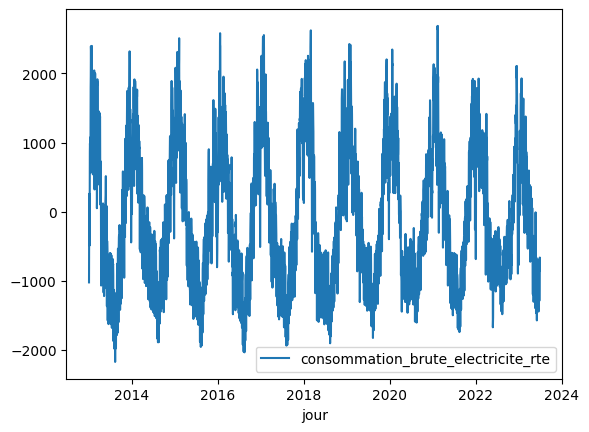

In [298]:
serie_temporelle_lissee.plot()

In [299]:
serie_temporelle_lissee.head()

,consommation_brute_electricite_rte
jour,
2013-01-01,-1021.552676
2013-01-02,11.984418
2013-01-03,253.289345
2013-01-04,260.658533
2013-01-05,-184.467649


In [300]:
# Première différenciation (ordre 1)
daily_data_diff = daily_data.diff()

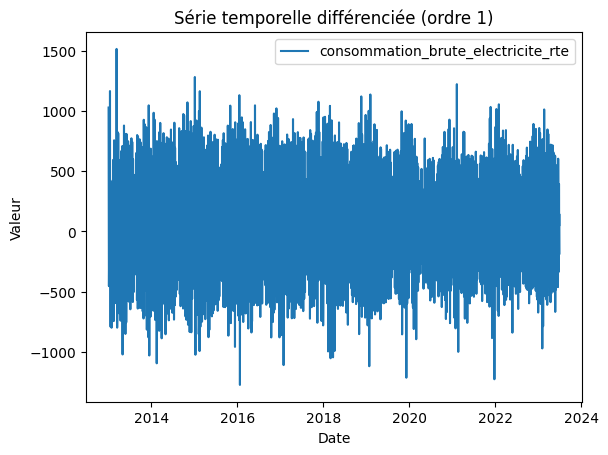

In [301]:
# Supprimez les lignes contenant des valeurs NaN résultant de la différenciation
daily_data_diff = daily_data_diff.dropna()

# Affichez la série temporelle différenciée
daily_data_diff.plot()
plt.title("Série temporelle différenciée (ordre 1)")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.show()

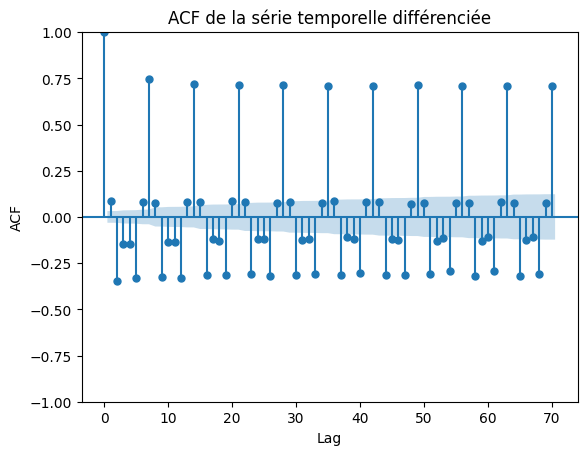

In [302]:
# Tracer l'ACF
plot_acf(daily_data_diff, lags=70)
plt.title("ACF de la série temporelle différenciée")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

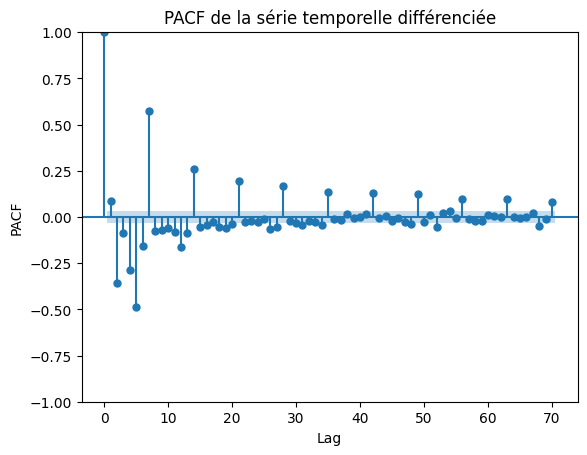

In [303]:
# Tracer le PACF
plot_pacf(daily_data_diff, lags=70)
plt.title("PACF de la série temporelle différenciée")
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

#### D'après les diagrammes d'ACF et de PACF on constate que p = 1 et q=1 et d=1

In [304]:
import statsmodels.api as sm

In [305]:
# Spécifiez le modèle ARIMA
model = sm.tsa.ARIMA(serie_temporelle_lissee.dropna(), order=(1, 0, 1))

# Ajustez le modèle aux données
results = model.fit()

/home/apprenant/miniconda3/envs/mlrecap_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/miniconda3/envs/mlrecap_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/miniconda3/envs/mlrecap_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [306]:
print(results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     consommation_brute_electricite_rte   No. Observations:                 3833
Model:                                 ARIMA(1, 0, 1)   Log Likelihood              -28066.129
Date:                                Tue, 19 Sep 2023   AIC                          56140.258
Time:                                        11:53:59   BIC                          56165.264
Sample:                                    01-01-2013   HQIC                         56149.141
                                         - 06-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3556     67.988      0.079      0.937    -127.898     138.609
ar.

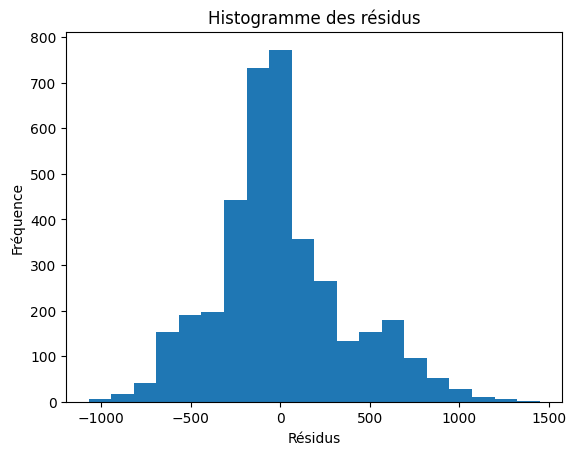

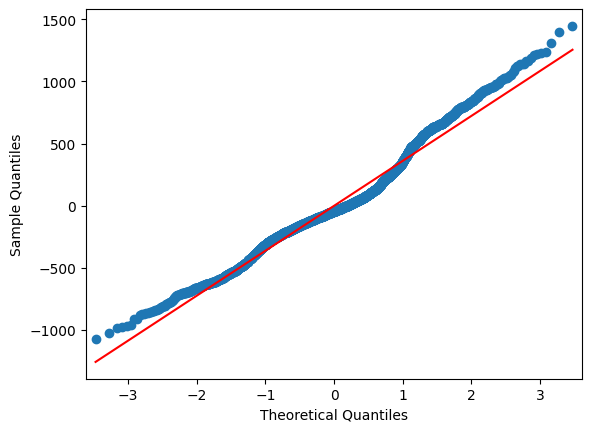

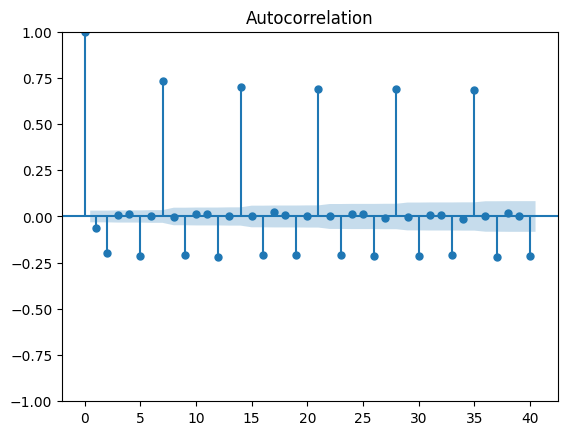

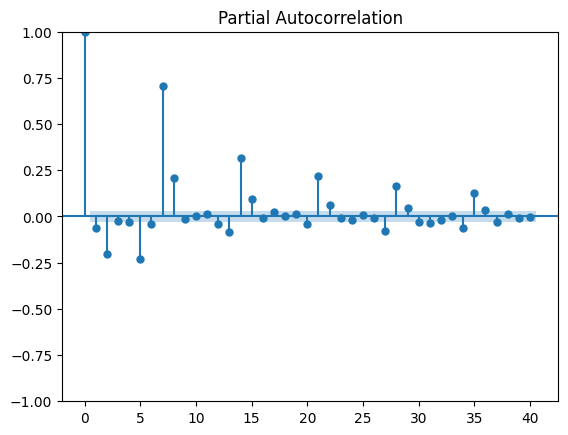

In [307]:
# Obtenez les résidus du modèle
residuals = results.resid

# Tracez l'histogramme des résidus pour vérifier leur distribution
import matplotlib.pyplot as plt
plt.hist(residuals, bins=20)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Histogramme des résidus')
plt.show()

# Tracez un graphique Q-Q des résidus pour vérifier s'ils suivent une distribution normale
import statsmodels.api as sm
sm.qqplot(residuals, line='r')
plt.show()

# Tracez l'autocorrélogramme des résidus pour vérifier s'il reste de la structure
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

# Tracez le graphe de l'autocorrélation partielle des résidus
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

In [308]:
# Obtenez les prévisions pour une période future spécifique
forecast_period = 7  # Par exemple, pour prédire 7 périodes à l'avance
forecast = results.get_forecast(steps=forecast_period)

# Obtenez les valeurs prédites
forecast_mean = forecast.predicted_mean

# Obtenez les intervalles de confiance pour les prévisions
forecast_ci = forecast.conf_int()

# Affichez les prévisions et les intervalles de confiance
print("Prévisions :")
print(forecast_mean)

print("\nIntervalles de confiance :")
print(forecast_ci)

Prévisions :
2023-07-01   -819.589188
2023-07-02   -718.193303
2023-07-03   -629.260222
2023-07-04   -551.258115
2023-07-05   -482.843428
2023-07-06   -422.837750
2023-07-07   -370.207510
Freq: D, Name: predicted_mean, dtype: float64

Intervalles de confiance :
            lower consommation_brute_electricite_rte  \
2023-07-01                              -1541.401537   
2023-07-02                              -1843.078337   
2023-07-03                              -1984.983089   
2023-07-04                              -2060.724831   
2023-07-05                              -2100.670023   
2023-07-06                              -2119.320037   
2023-07-07                              -2124.800313   

            upper consommation_brute_electricite_rte  
2023-07-01                                -97.776839  
2023-07-02                                406.691731  
2023-07-03                                726.462644  
2023-07-04                                958.208602  
2023-07-05    

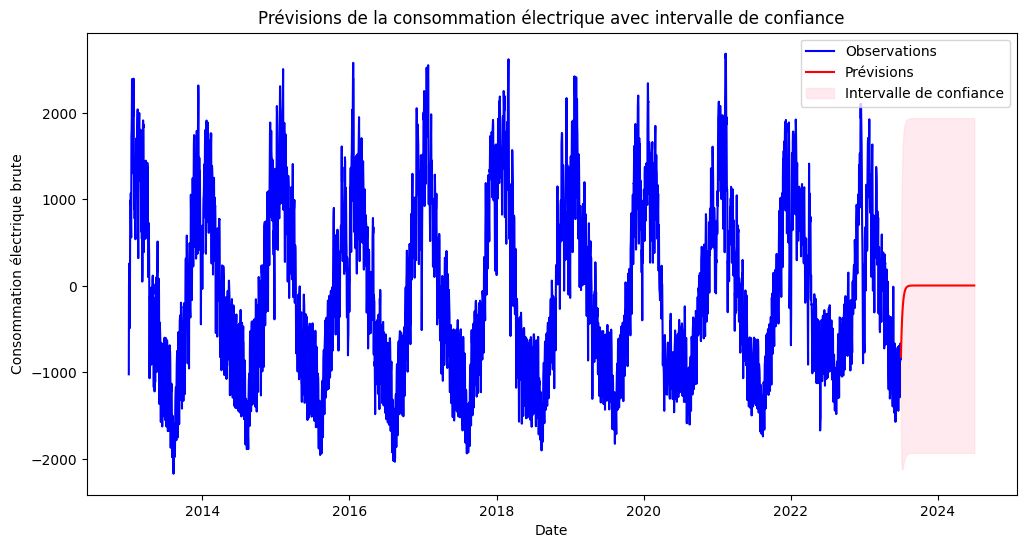

In [310]:
import matplotlib.pyplot as plt

# Obtenez les prévisions pour une période future spécifique
forecast_period = 365  # Par exemple, pour prédire 7 périodes à l'avance
forecast = results.get_forecast(steps=forecast_period)

# Obtenez les valeurs prédites
forecast_mean = forecast.predicted_mean

# Obtenez les intervalles de confiance pour les prévisions
forecast_ci = forecast.conf_int()

# Créez un graphique
plt.figure(figsize=(12, 6))

# Tracez les valeurs prédites
plt.plot(serie_temporelle_lissee.index, serie_temporelle_lissee['consommation_brute_electricite_rte'], label='Observations', color='blue')
plt.plot(forecast_mean.index, forecast_mean.values, label='Prévisions', color='red')

# Remplissez les intervalles de confiance
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Intervalle de confiance')

# Ajoutez des étiquettes et une légende
plt.xlabel('Date')
plt.ylabel('Consommation électrique brute')
plt.title('Prévisions de la consommation électrique avec intervalle de confiance')
plt.legend()

# Affichez le graphique
plt.show()
